In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

In [3]:
# Exercise 1a

def aleatory_DNA(size, perc_cg = 0.5):
    """
    Creates an aleatory DNA sequence of a chosen length and CG percentage.
    The fn generates random numbers between 0 and 1, if value <= CG percentages it chooses by chance a T or A base.
    Each selected base is added to a string until the chosen size is reached.
    
    Params:
    -------------
    size: int
        size of the sequence
    perc_cg: float
        percentage of CG in the sequence. Range 0.0 - 1.0, by default = 0.5
    
    Returns
    -------
    A string of randomized nucleotides with defined percentage of CG 
      
    """
    at = ['A', 'T']
    cg = ['C', 'G']
    seq = ''
    for x in range(size):
        if random.random() <= perc_cg:
            seq += random.choice(cg)
        else:
            seq += random.choice(at)

    return seq

In [4]:
aleatory_DNA(100, perc_cg = 0.5)

'ACAATGGCAGAGAAGTGGGTATAGTTTCACCGATAGCAAGAGCAACAATTCTATTCGGTTCACAATTGCCGAGCTGATATCATTCTCCGGACCTCGCAAG'

In [5]:
# Exercise 1b with aminoacids frequencies

def aleatory_protein(size):
    """
    Creates an aleatory protein sequence with weights for every aminoacid
    Based on random.choices() that returns a k sized list from a population of values (aa_list) and the selection is made according the relative weights (aa_weights)
    More info: https://docs.python.org/3/library/random.html
    
    Params:
    -------------
    size: int
        size of the sequence
    aa_dict: dict
        dictionary with the 20 aminoacids as keys and their weights in % as values.

    Returns
    -------
    A string with randomized and weightened aminoacids
    
    """

    # Choose your desired aa weights
    aa_weights = {
                'A': 5,
                'C': 5,
                'D': 5,
                'E': 5,
                'F': 5,
                'G': 5,
                'H': 5,
                'I': 5,
                'K': 5,
                'L': 5,
                'M': 5,
                'N': 5,
                'P': 5,
                'Q': 5,
                'R': 5,
                'S': 5,
                'T': 5,
                'V': 5,
                'W': 5,
                'Y': 5
                }

    # Fn first checks that the probabilities of all the aa sum 100%
    if sum(aa_weights.values()) == 100:
        aa_list = list(aa_weights.keys())
        aa_weights = list(aa_weights.values())
        random_sequence = random.choices(aa_list, weights=aa_weights,k=size)
        random_sequence_string = ''.join(random_sequence)
        return random_sequence_string
    else:
        print("Wrong aminoacid weights! The sum must be 100%!")

In [6]:
aleatory_protein(100)

'HEFCYSQKMQCYMRWAWAMCCGLFGHLIMRRFLSRDPHMDLKAYDFNFNLVHLLHMPQTVKGQRPFFHTNNHVILPSKKIYNEHPQIQDLWCYRCNKLMV'

In [7]:
# Exercise 1c

def sequence_type(sequence):
    """
    Fn that defines if a sequence is DNA or protein
    Returns "DNA", "Protein" or "Unknown
    """
    dna_alphabet = {'A', 'T', 'C', 'G'}
    protein_alphabet = set("ACDEFGHIKLMNPQRSTVWY")

    sequence_set = set(sequence.upper())

    if sequence_set.issubset(dna_alphabet):
        return "DNA"
    elif sequence_set.issubset(protein_alphabet):
        return "Protein"
    else:
        return "Unknown"

def estimate_frequency(sequence):
    """
    Fn that it receives a sequence of DNA or proteins and estimates the frequencies of the nucleotides or aminoacids
    Returns
    """
    seq_type = sequence_type(sequence)
    
    if seq_type == "DNA":
        nucleotide_frequency = {nucleotide: sequence.upper().count(nucleotide) / len(sequence) for nucleotide in 'ATCG'}
        return pd.DataFrame(nucleotide_frequency.items(), columns=['Nucleotides','Relative frequencies'])
    elif seq_type == "Protein":
        aa_frequency = {aa: sequence.upper().count(aa) / len(sequence) for aa in 'ACDEFGHIKLMNPQRSTVWY'}
        return pd.DataFrame(aa_frequency.items(), columns=['Aminoacids','Relative frequencies'])
    else:
        return "Cannot estimate frequency for an unknown sequence type."
    
def estimate_codon_aminoacid_frequency(sequence):
    """
    Fn that receives a DNA sequence
    """
    codon_to_aa = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'STOP', 'TAG':'STOP',
        'TGC':'C', 'TGT':'C', 'TGA':'STOP', 'TGG':'W',
    }
    
    seq_type = sequence_type(sequence)

    if seq_type == "DNA":
        # First estimate codons frequency
        # Iinitialize a dictionary with the 64 codons as keys and 0 as values
        codons_freq_abs = {k:0 for k in codon_to_aa.keys()}

        # Then iterate along the whole sequence in steps of 3 and slice the codons. 
        # For each found codon(key) add 1 to the frequency(value)
        codon_count = 0
        aa_sequence = ""
        for i in range(0, len(sequence),3):
            codon = sequence[i:i+3]
            codon_count += 1
            if len(codon) == 3:
                codons_freq_abs[codon]+=1
                aa = codon_to_aa[codon]
                aa_sequence += aa
                aa_count = len(aa_sequence)
            codons_freq_rel = {key:value/codon_count for key,value in codons_freq_abs.items()}
            codons_freq_rel = pd.DataFrame(codons_freq_rel.items(), columns=['Codons','Relative frequencies'])
        

        # Secondly estimate aa frequency from the translated codons
        # Initialize a dictionary with thre 20 aa as keys and 0 for their values
        aa_freq_abs = {aa:0 for aa in codon_to_aa.values()}

        # translate each codon and sum the frequencies of each aa
        for codon,freq in codons_freq_abs.items():
            if freq != 0:
                aa = codon_to_aa[codon]
                aa_freq_abs[aa] += freq
            aa_freq_rel = {key:value/aa_count for key,value in aa_freq_abs.items()}
            aa_freq_rel = pd.DataFrame(aa_freq_rel.items(), columns=['Aminoacids','Relative frequencies'])

            
        
        return codons_freq_rel, aa_freq_rel
    
    else:
        raise ValueError("Input value sequence must be DNA!")
    
def plot_frequencies(df):
    plt.figure(figsize=(12 , 6))

    if df.columns[0] == "Nucleotides":
        plt.bar(df[df.columns[0]], df[df.columns[1]])


    if df.columns[0] == "Codons":    

        # To make graphs showing the STOP codons
        stop_codons = ['TAA', 'TAG', 'TGA']

        # Filter DataFrame to get rows without stop codons
        non_stop_codon_rows = df[~df['Codons'].isin(stop_codons)]
        stop_codon_rows = df[df['Codons'].isin(stop_codons)]

        # Concatenate the rows
        concatenated_rows = pd.concat([non_stop_codon_rows, stop_codon_rows])

        # Sort the rows by 'Relative frequencies'
        sorted_rows = concatenated_rows.sort_values(by='Relative frequencies')

        # Create a bar plot with stop codon bars in black
        bars = plt.bar(sorted_rows['Codons'], sorted_rows['Relative frequencies'], label='Non Stop Codons')
        for index, row in stop_codon_rows.iterrows():
            if row['Codons'] in sorted_rows['Codons'].values:
                bar_index = sorted_rows['Codons'].values.tolist().index(row['Codons'])
                bars[bar_index].set_color('black')

        # Add a custom legend entry for the black bars
        legend_labels = ['Non Stop Codons', 'Stop Codons']
        legend_handles = [plt.Line2D([0], [0], color='blue', linewidth=3),
                        plt.Line2D([0], [0], color='black', linewidth=3)]

        # Add a legend
        plt.legend(legend_handles, legend_labels)


    if df.columns[0] == "Aminoacids":

        AA_COLORS = {
                    'red': ['G', 'A', 'V', 'L', 'I', 'M'], 
                    'blue':['F', 'W', 'Y'],
                    'green': ['C', 'T', 'S', 'N', 'P', 'Q'],
                    'yellow': ['H', 'K', 'R'],
                    'orange': ['D', 'E'],
                    'black': ['STOP']
                    }

        AA_GROUPS = {
                    'non_polar_aliphatic': ['G', 'A', 'V', 'L', 'I', 'M'], 
                    'aromatic':['F', 'W', 'Y'],
                    'polar': ['C', 'T', 'S', 'N', 'P', 'Q'],
                    'positive': ['H', 'K', 'R'],
                    'negative': ['D', 'E'],
                    'STOP': ['STOP']
                    }

        colors = {v:key for key,value in AA_COLORS.items() for v in value}
        groups = {v:key for key,value in AA_GROUPS.items() for v in value}
        colors_df = pd.DataFrame(colors.items(), columns=['Aminoacids','Colors'])
        groups_df = pd.DataFrame(groups.items(), columns=['Aminoacids','Type'])

        df_merge_colors_groups = pd.merge(colors_df, groups_df, on='Aminoacids', how='left')
        df = pd.merge(df, df_merge_colors_groups, on='Aminoacids', how='left')

        palette = {
                'non_polar_aliphatic': 'red', 
                'aromatic':'blue',
                'polar': 'green',
                'positive': 'yellow',
                'negative': 'orange',
                'STOP': 'black'
                }

        df = df.sort_values(by='Relative frequencies')
        ax = sns.barplot(x=df.columns[0], y=df.columns[1], data=df, hue="Type", dodge=False, palette=palette)
        plt.legend(title='Type of Aminoacid', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)



    plt.title(f"Relative frequency of {df.columns[0]}")
    plt.xticks(rotation=90)
    plt.show()



def ejercicio_1c(sequence):
    seq_type = sequence_type(sequence)

    if seq_type == "DNA":
        df_nt_frequencies = estimate_frequency(sequence)
        plot_frequencies(df_nt_frequencies)
        df_codon_frequencies ,  df_aa_frequencies= estimate_codon_aminoacid_frequency(sequence)
        plot_frequencies(df_codon_frequencies)
        plot_frequencies(df_aa_frequencies)

    
    if seq_type == "Protein":
        df_frequencies = estimate_frequency(sequence)
        plot_frequencies(df_frequencies)
        

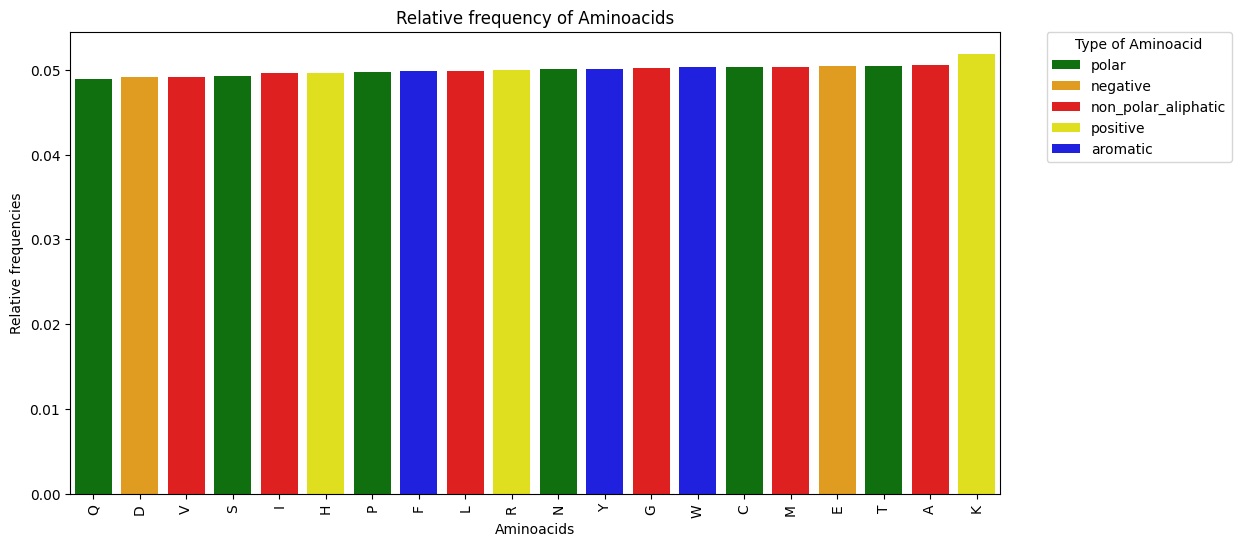

In [8]:
sequence_protein = aleatory_protein(100000)
ejercicio_1c(sequence_protein)

In randomly generated aminoacidic sequences the distribution of aminoacids has an homogeneous distribution

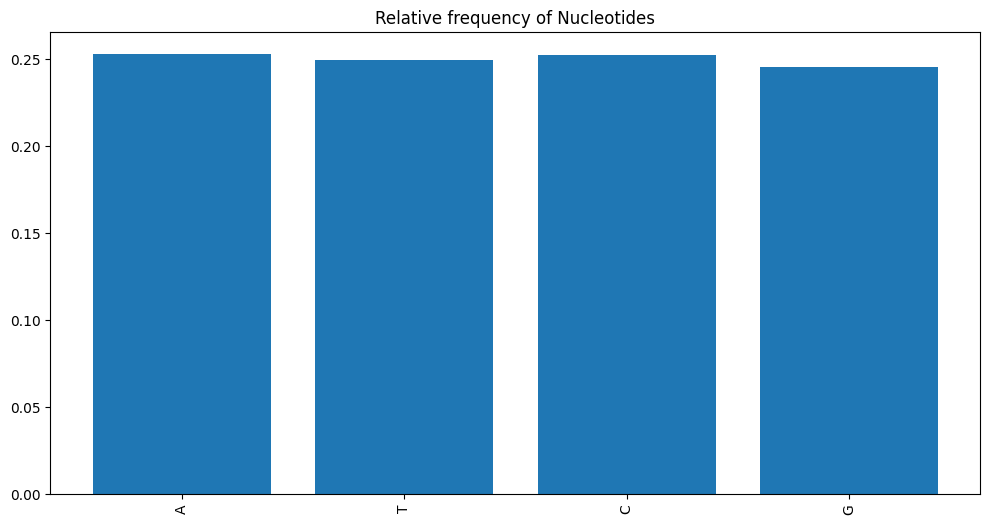

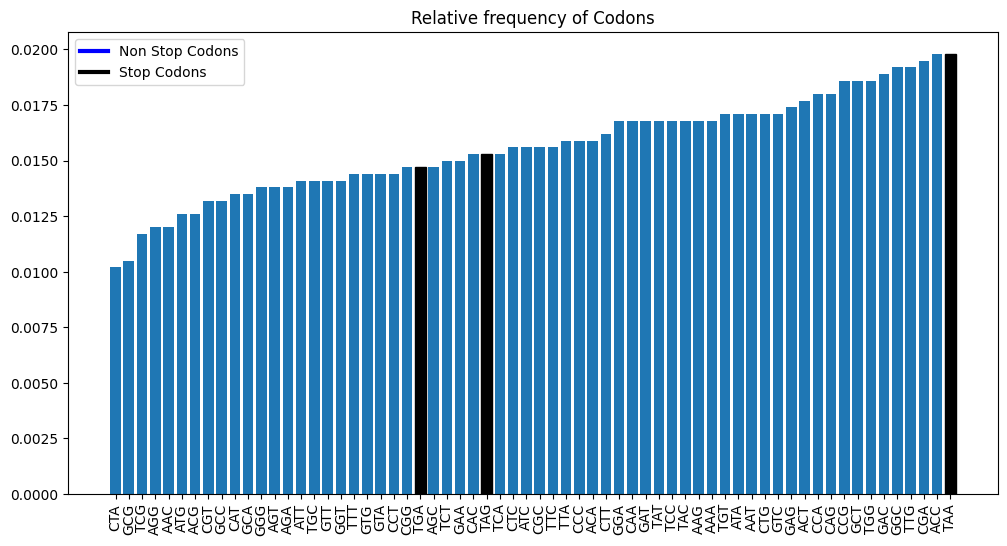

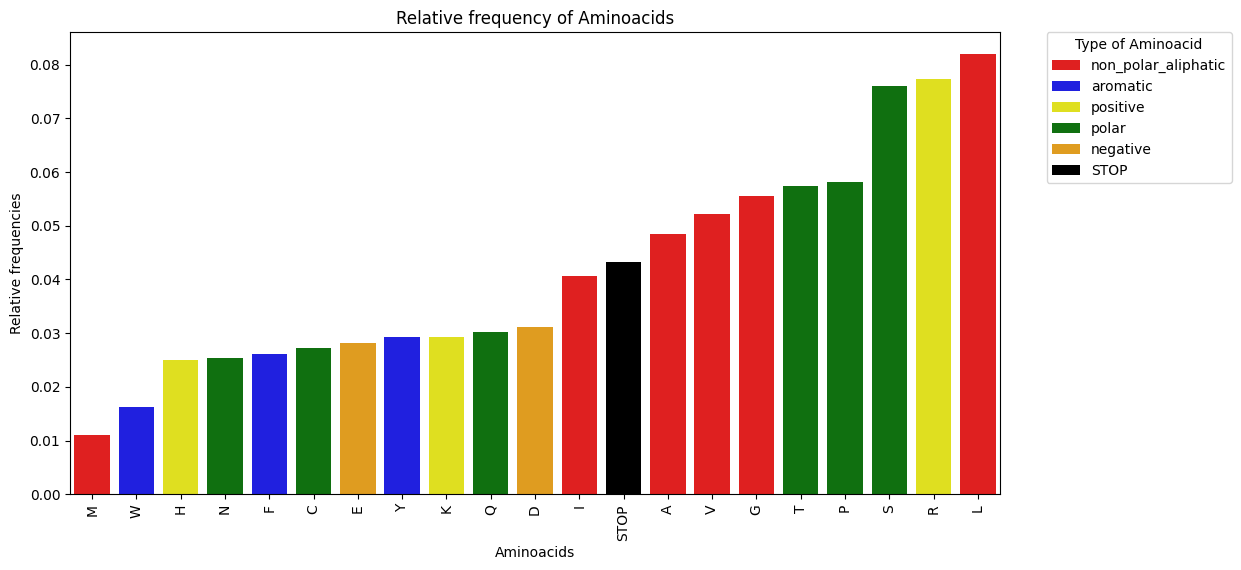

In [9]:
sequence_dna = aleatory_DNA(10000, perc_cg = 0.5)
ejercicio_1c(sequence_dna)

On randomly generated DNA sequences, the aminoacids don´t have an homogeneous distribution.
In this case, the aminoacids that have more than one codon in the genetic code, have higher frequencies.
The most represented aminoacids are L (leucine), R (argininee) and S (serine). Each of these has 3 synonymous codons.
On the other hand, the least represented aminoacid is W (tryptophan) which has only one codon.

In [10]:
    # Lets print the amount of synonumous codons for each aminoacid
    
    codon_to_aa = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'STOP', 'TAG':'STOP',
        'TGC':'C', 'TGT':'C', 'TGA':'STOP', 'TGG':'W',
    }
Counter([values for values in codon_to_aa.values()])

Counter({'S': 6,
         'R': 6,
         'L': 6,
         'T': 4,
         'P': 4,
         'V': 4,
         'A': 4,
         'G': 4,
         'I': 3,
         'STOP': 3,
         'N': 2,
         'K': 2,
         'H': 2,
         'Q': 2,
         'D': 2,
         'E': 2,
         'F': 2,
         'Y': 2,
         'C': 2,
         'M': 1,
         'W': 1})

In [11]:
def orf_length_distribution(sequence):
    '''
    Function that looks for the indexes of all the STOP codons in the first frameshift of a DNA sequence.
    Then computes the length (in codons) between all the consecutive ORFs found in the sequence.
    Returns the average lenth (float) of the found ORFs in the sequence.
    '''
    stop_codons = ['TAA', 'TAG', 'TGA']
    stop_codons_indexes = [i for i in range(0,len(sequence),3) if sequence[i:i+3] in stop_codons]
    orf_lengths = [((stop_codons_indexes[i+1] - stop_codons_indexes[i])/3)-1 for i in range(len(stop_codons_indexes)-1)]

    if len(orf_lengths) > 0:
        return sum(orf_lengths)/len(orf_lengths)
    else:
        return 0

In [12]:
# Exercise 1d

sequence = aleatory_DNA(10000, perc_cg = 0.5)
orf_lengths = orf_length_distribution(sequence)

print(f'There is a STOP codon every {orf_lengths:.2f} codons in a random generated DNA sequence')

There is a STOP codon every 21.03 codons in a random generated DNA sequence


In [13]:
### Exercise 1e

### 0) lets generate several random DNA sequences and compute the average ORF distance when the GC content is 50% :

sequences = 200
lengths = []
for i in range(sequences):
    sequence = aleatory_DNA(1000, perc_cg = 0.5)
    lenght = orf_length_distribution(sequence)
    lengths.append(lenght)

print(f'For {sequences} sequences with 50% GC content the average ORF lenght is {sum(lengths)/len(lengths):.2f} codons')

For 200 sequences with 50% GC content the average ORF lenght is 20.24 codons


For 200 sequences with 0% GC content the average ORF length is 6.80 codons
For 200 sequences with 25.0% GC content the average ORF length is 10.24 codons
For 200 sequences with 50.0% GC content the average ORF length is 20.17 codons
For 200 sequences with 100% GC content the average ORF length is 0.00 codons


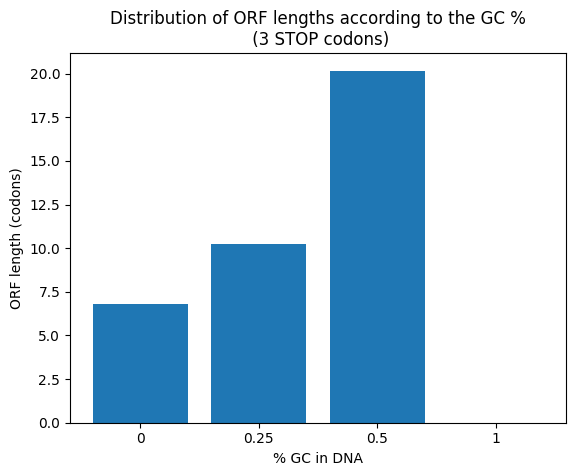

In [14]:
### i) lets generate several random DNA sequences with different % of GC and compute the average ORF distance:

sequences = 200
gc_content = [0,0.25,0.5,1]
lengths = []
length_dic = {}

for gc in gc_content:
    lengths = []
        
    for i in range(sequences):
        sequence = aleatory_DNA(1000, perc_cg = gc)
        lenght = orf_length_distribution(sequence)
        lengths.append(lenght)
    length_dic[gc] = lengths
    
results = {k:sum(v)/sequences for k,v in length_dic.items()}

for k,v in results.items():
    print(f'For {sequences} sequences with {k*100}% GC content the average ORF length is {v:.2f} codons')

# Graph
keys = list(results.keys())
keys = [str(k) for k in keys]
values = list(results.values())

plt.bar(keys, values)
plt.xlabel('% GC in DNA')
plt.ylabel('ORF length (codons)')
plt.title('Distribution of ORF lengths according to the GC %\n (3 STOP codons)')
plt.show()

When:

%GC=0 even though the only available STOP codon is TAA, its frequency increases a lot because there are only 6 other working codons and there is a STOP codon every 7 codons (1 stop/7 codons).

%GC=100 there will be no A or T nucleotides in the DNA sequence, so no STOP codons will be availble. For this reason, no ORFs will are found

For 200 sequences with 0% GC content the average ORF length is 0.00 codons
For 200 sequences with 25.0% GC content the average ORF length is 28.08 codons
For 200 sequences with 50.0% GC content the average ORF length is 31.70 codons
For 200 sequences with 100% GC content the average ORF length is 0.00 codons


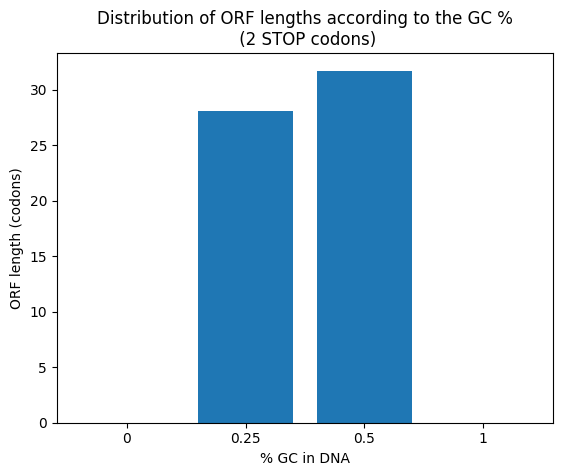

In [15]:
### ii) lets generate several random DNA sequences with a different genetic code, in this case TAA is not considered adn there will be two STOP codons instead of 3


def orf_length_distribution_modified(sequence):
    '''
    ATTENTION! This function only recognizes 2 codons instead of 3!!!!!
    Function that looks for the indexes of all the STOP codons in the first frameshift of a DNA sequence.
    Then computes the length (in codons) between all the consecutive ORFs found in the sequence.
    Returns the average lenth (float) of the found ORFs in the sequence.
    '''
    stop_codons = ['TAG', 'TGA']
    stop_codons_indexes = [i for i in range(0,len(sequence),3) if sequence[i:i+3] in stop_codons]
    orf_lengths = [((stop_codons_indexes[i+1] - stop_codons_indexes[i])/3)-1 for i in range(len(stop_codons_indexes)-1)]

    if len(orf_lengths) > 0:
        return sum(orf_lengths)/len(orf_lengths)
    else:
        return 0

sequences = 200
gc_content = [0,0.25,0.5,1]
lengths = []
length_dic = {}

for gc in gc_content:
    lengths = []
        
    for i in range(sequences):
        sequence = aleatory_DNA(1000, perc_cg = gc)
        lenght = orf_length_distribution_modified(sequence)
        lengths.append(lenght)
    length_dic[gc] = lengths
    
results = {k:sum(v)/sequences for k,v in length_dic.items()}

for k,v in results.items():
    print(f'For {sequences} sequences with {k*100}% GC content the average ORF length is {v:.2f} codons')

# Graph
keys = list(results.keys())
keys = [str(k) for k in keys]
values = list(results.values())

plt.bar(keys, values)
plt.xlabel('% GC in DNA')
plt.ylabel('ORF length (codons)')
plt.title('Distribution of ORF lengths according to the GC %\n (2 STOP codons)')
plt.show()

If we compare this result with the previously made graph
When:

%GC=0 as TAA is removed, there are no codons coding for a STOP signal.

### Results with different %GC

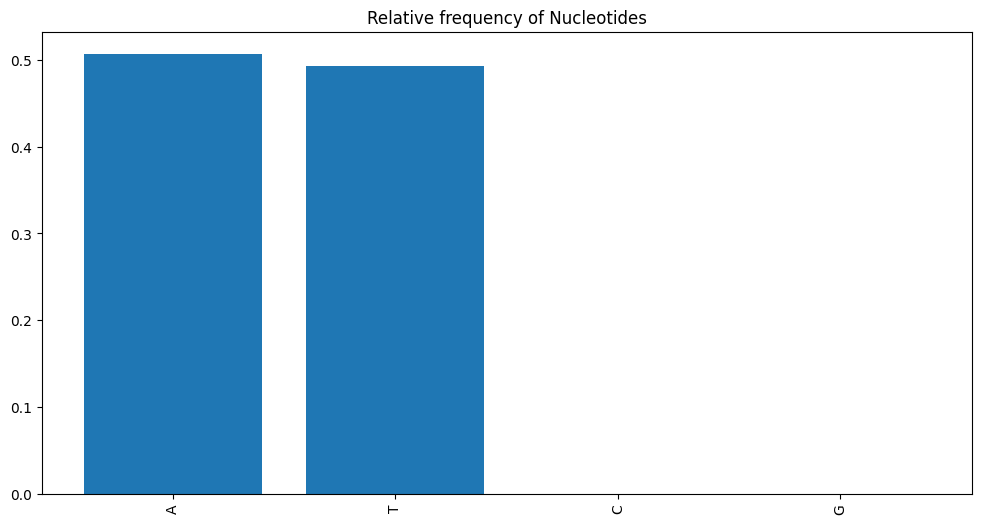

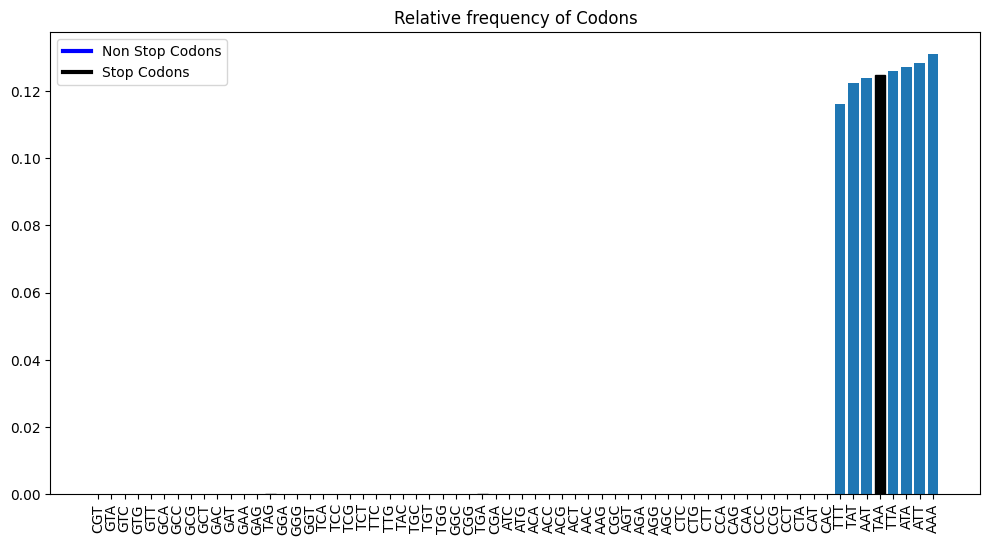

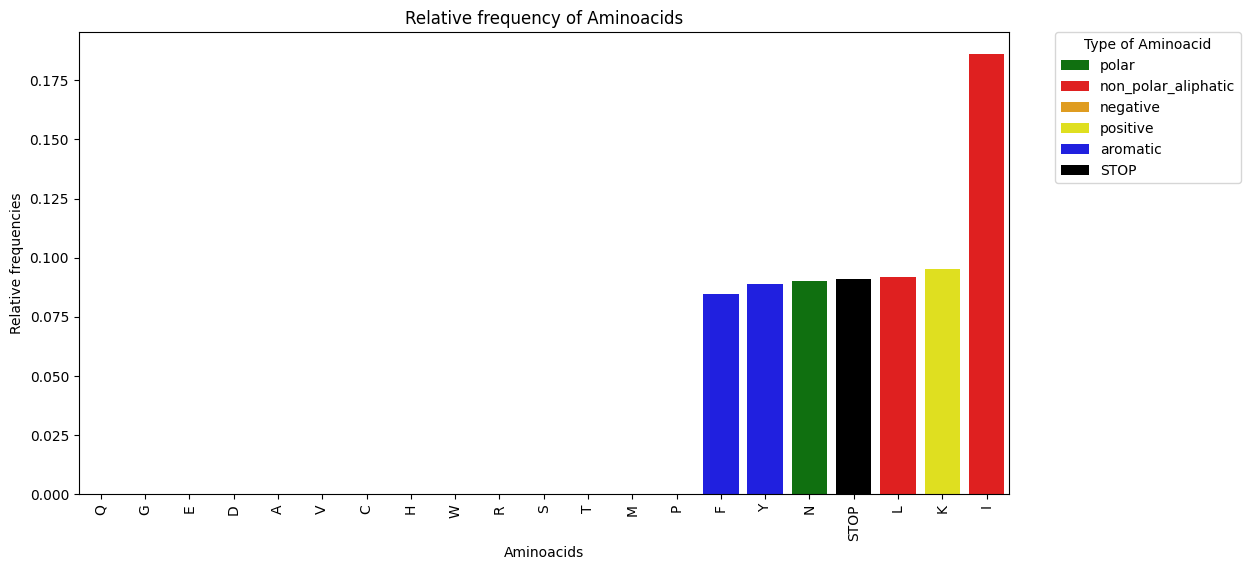

In [16]:
#What happens with 0% GC?

sequence_dna = aleatory_DNA(10000, perc_cg = 0)
ejercicio_1c(sequence_dna)

With 0% GC in a randomly generated sequence, there are only 8 available codons from the genetic code and only one is a STOP codon.

As a consequence, there are only 6 aminoacids and one STOP signal. 

Even though there is only one STOP signal, its frequency is 1/7, so the ORFs lengths are shorter, with an average mean of 7 codons.

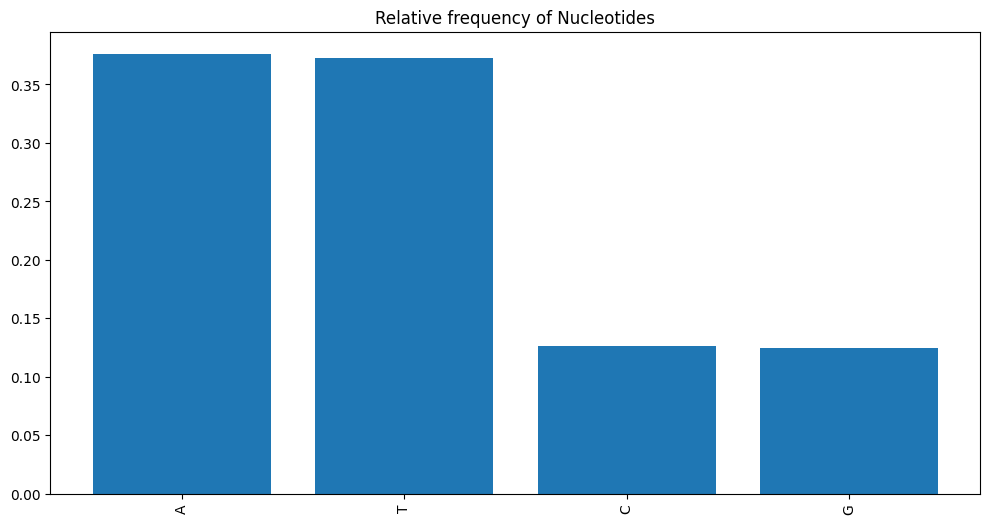

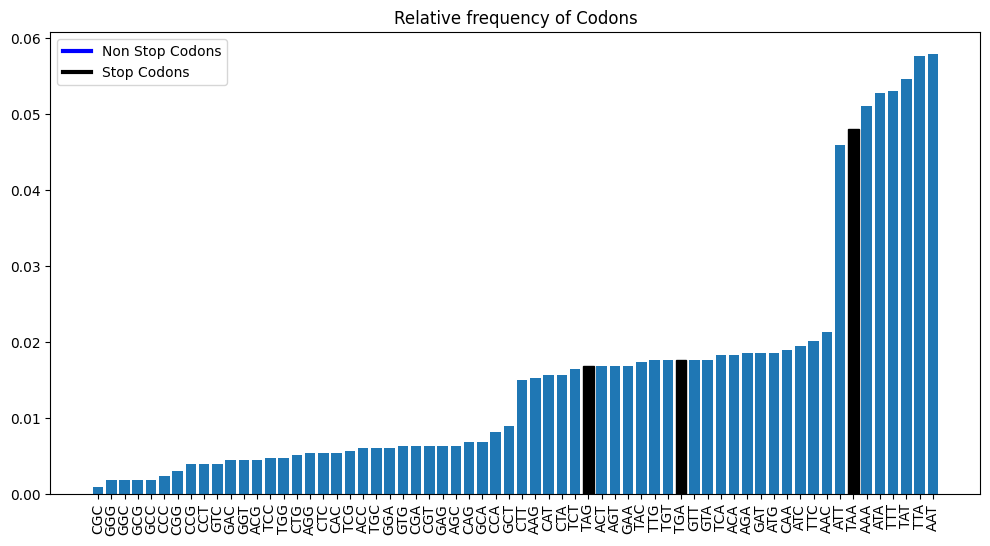

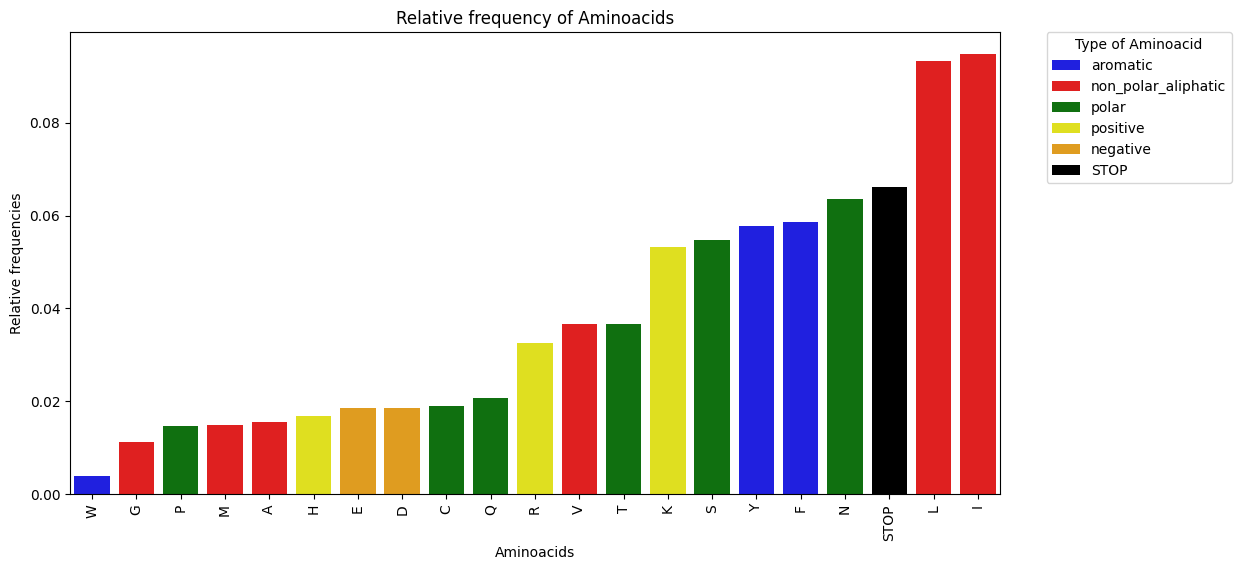

In [18]:
#What happens with 25% GC?

sequence_dna = aleatory_DNA(10000, perc_cg = 0.25)
ejercicio_1c(sequence_dna)

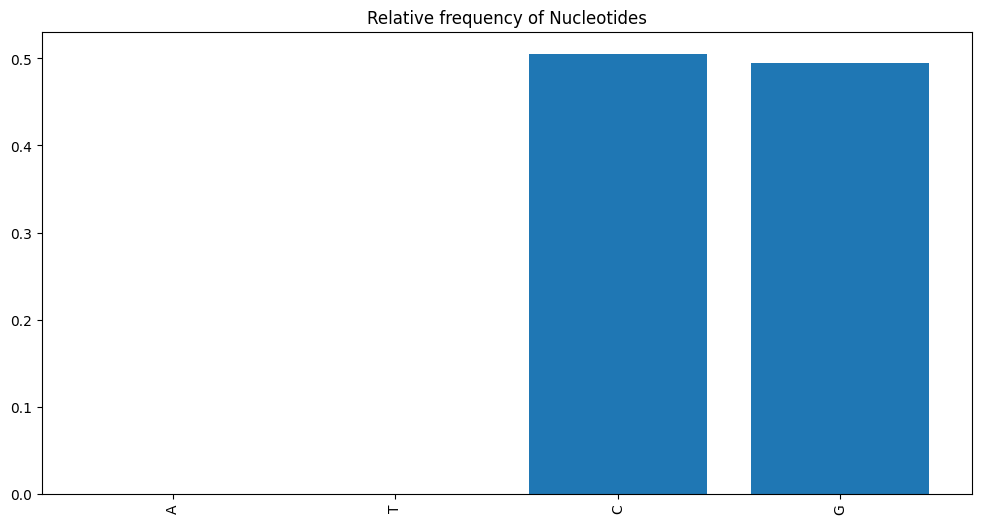

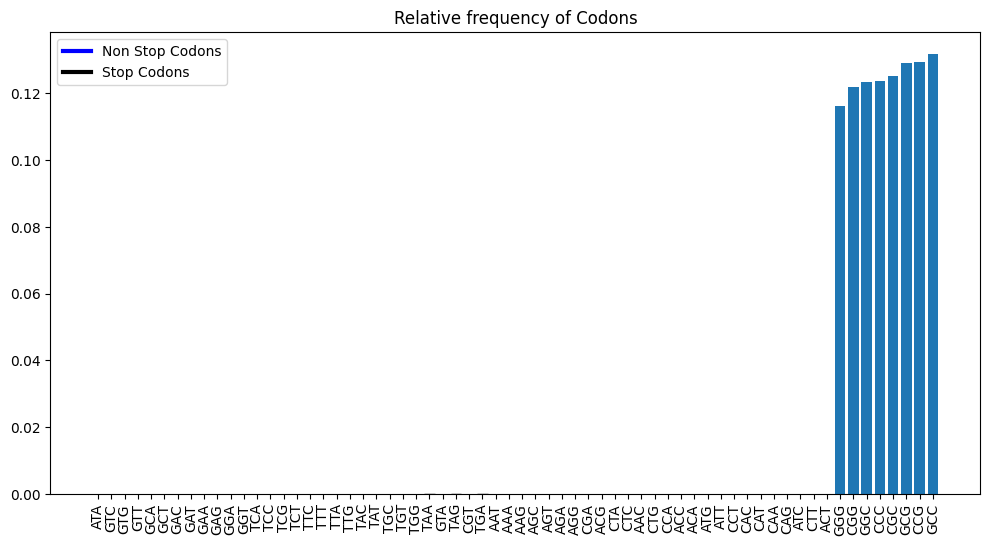

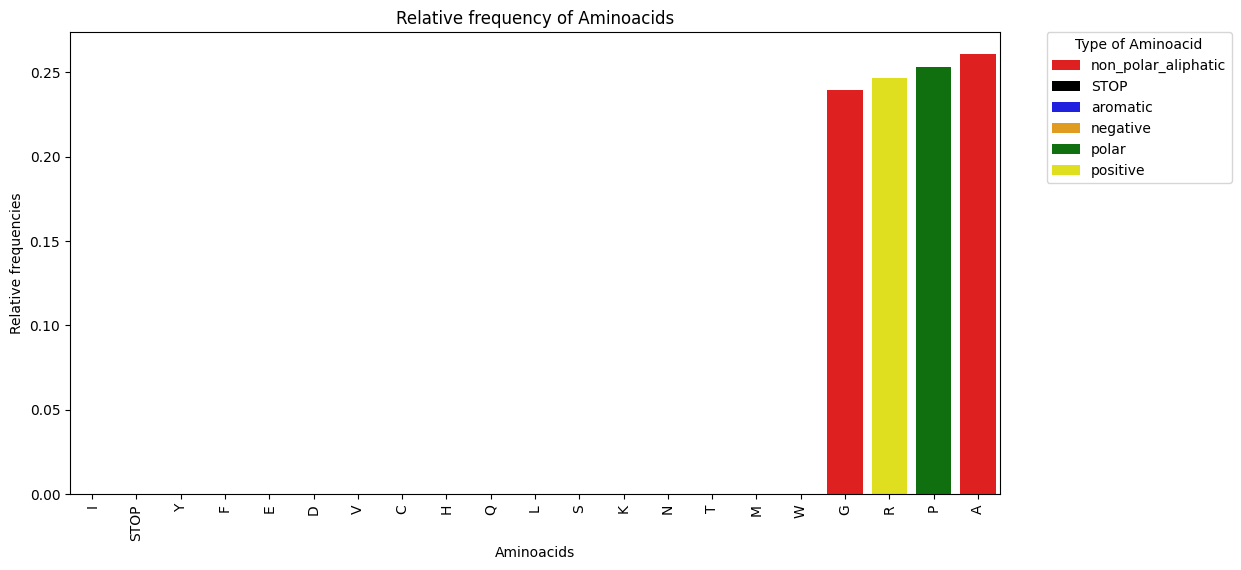

In [17]:
# What happens with 100% GC?

sequence_dna = aleatory_DNA(10000, perc_cg = 1)
ejercicio_1c(sequence_dna)

With 100% GC in a randomly generated sequence, there are only 8 available codons from the genetic code and none of them is a STOP codon.

As a consequence, there are only 4 aminoacids and no STOP signal. 

This results in the absense of ORF in the generated sequences.